In [7]:
import time

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import torch 

import torch.optim as optim

## Find the Minimizer of Rosenbrock Function
 $$
     F(x_1,x_2):= 100 (x_2-x_1^2)^2 + (x_1-1)^2
 $$
 
 <img
 src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Rosenbrock_function.svg/1080px-Rosenbrock_function.svg.png"
 width="500" height="500"
 align="center"
 />
 

In [8]:
def rosenbrock(x):
    y = 100 * (x[1]-x[0]*x[0])**2 + (x[0]-1)**2
    return y

In [9]:
x = torch.tensor([1.0,1.0],requires_grad=True)
y = rosenbrock(x)
y.backward()

print('y = ', y.item())
print('dy/dx = ',x.data)

y =  0.0
dy/dx =  tensor([1., 1.])


- Use the optimizer provided by torch.optim to solve the problem

In [11]:
x = torch.rand(2,requires_grad=True)

optimizer = torch.optim.SGD([x],lr=0.001,momentum=0.9,nesterov=True)

In [ ]:

class Optim(optim.optimizer):
    def __init__(self, inputdata,grad):
    
    
    
        
    def step(self):
        
        

In [12]:
class GD(optim.Optimizer):
    def __init__(self, params, lr=1.0, alpha=0.9, eps=1e-6, weight_decay=0):
        defaults = dict(lr=lr, alpha=alpha, eps=eps, weight_decay=weight_decay)
        super(GD, self).__init__(params, defaults)
        
        if lr is not required and lr < 0.0:
            raise ValueError("Invalid learning rate: {}".format(lr))
       
    
    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()
            
        for group in self.param_groups:
            weight_decay = group['weight_decay']
             
            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data
                
            # set initial
            
                if weight_decay != 0:
                    d_p.add_(weight_decay, p.data)
                p.data.add_(-group['lr'], d_p)
        return loss

In [12]:
records = []

for i in range(500):
    optimizer.zero_grad()
    y = rosenbrock(x)
    y.backward()
    optimizer.step()
    
    if i%100 == 0:
        print('%d, %.2e'%(i+1,y.item()))
    records.append(y.item())

1, 7.17e+01
101, 1.54e-01
201, 3.73e-02
301, 1.26e-02
401, 4.80e-03


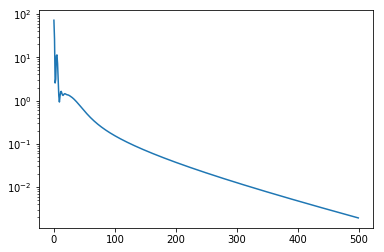

In [13]:
plt.semilogy(records,'-');

- 尝试其它算法